<a href="https://colab.research.google.com/github/putrimelanitalb/Simple-Classification-Using-Decision-Tree/blob/main/classification_dt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Install library***

In [1]:
pip install pandas

In [2]:
pip install numpy

In [3]:
pip install matplotlib

In [4]:
pip install -U scikit-learn

***Import library***

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

***Read data csv***

In [6]:
data = pd.read_csv('SomervilleHappinessSurvey.csv')

# Ubah tipe data kelas 'D' dari integer menjadi kategori
data['D'] = data['D'].astype('category')

# Jumlah data yang terdapat null
data.isnull().sum()

D     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

***Split data train dan data test***

In [7]:
# Split feature dan class-nya
features = ['X1','X2','X3','X4','X5','X6']
x = data[features]
y = data['D']

# Split data train 80% dan data test 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

print('Data Train : {} data'.format(np.shape(x_train)))
print('Data Test  : {} data'.format(np.shape(x_test)))

Data Train : (114, 6) data
Data Test  : (29, 6) data


***Training data***

In [8]:
# Training data menggunakan algoritme Decision Tree
model = DecisionTreeClassifier(max_depth=20, random_state=3)
model = model.fit(x_train, y_train)

# Prediksi data test
predict_test = model.predict(x_test)

# Classification report
print('\nClassification Report :')
print(classification_report(y_test, predict_test))

# Tingkat akurasi
print('\nAccuracy :', accuracy_score(y_test, predict_test))

# Confusion matrix
print('\nConfusion Matrix :')
cm = confusion_matrix(y_test, predict_test)
print(cm)


Classification Report :
              precision    recall  f1-score   support

           0       0.67      0.53      0.59        15
           1       0.59      0.71      0.65        14

    accuracy                           0.62        29
   macro avg       0.63      0.62      0.62        29
weighted avg       0.63      0.62      0.62        29


Accuracy : 0.6206896551724138

Confusion Matrix :
[[ 8  7]
 [ 4 10]]


<function matplotlib.pyplot.show>

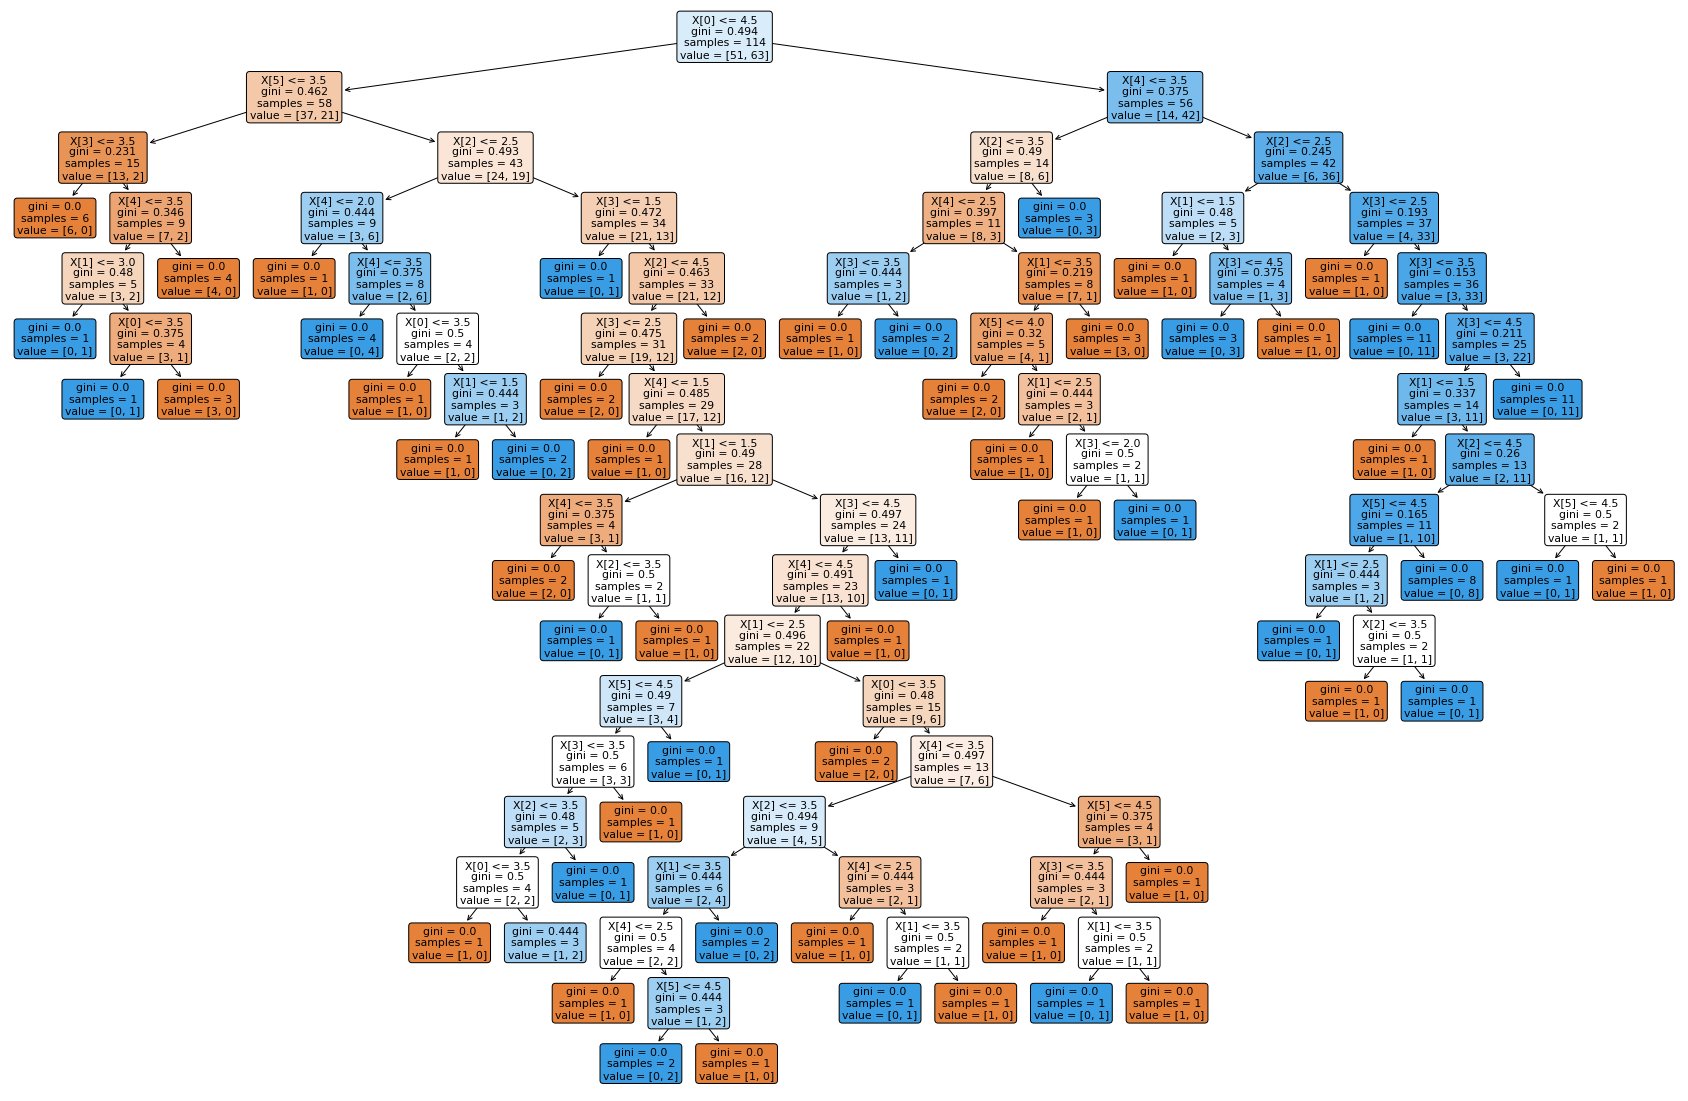

In [9]:
# Plot tree
fig = plt.figure(figsize=(30,20))
plot_tree(model, filled=True, rounded=True)
plt.show

In [10]:
# Prediksi kepuasan penduduk kota berdasarkan data input
print('SURVEY KEPUASAN PENDUDUK KOTA')
print('-------------------------\n')

print('**Beri penilaian dari angka 1-5**\n')

print('1. Ketersediaan informasi tentang pelayanan kota')
x1 = int(input('-> '))
print('2. Biaya perumahan')
x2 = int(input('-> '))
print('3. Kualitas keseluruhan sekolah umum')
x3 = int(input('-> '))
print('4. Kepercayaan Anda pada polisi setempat')
x4 = int(input('-> '))
print('5. Pemeliharaan jalan dan trotoar')
x5 = int(input('-> '))
print('6. Ketersediaan acara komunitas sosial')
x6 = int(input('-> '))

prediction = model.predict([[x1,x2,x3,x4,x5,x6]])

if prediction == 0:
  print('\nKesimpulan : Tidak puas')
else:
  print('\nKesimpulan : Puas')

SURVEY KEPUASAN PENDUDUK KOTA
-------------------------

**Beri penilaian dari angka 1-5**

1. Ketersediaan informasi tentang pelayanan kota
-> 5
2. Biaya perumahan
-> 5
3. Kualitas keseluruhan sekolah umum
-> 5
4. Kepercayaan Anda pada polisi setempat
-> 5
5. Pemeliharaan jalan dan trotoar
-> 4
6. Ketersediaan acara komunitas sosial
-> 4

Kesimpulan : Puas
